<a href="https://colab.research.google.com/github/Yasminebenhamadi/NMA/blob/main/CN/W1D4_Tutorial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 1: Geometric view of data

**Week 1, Day 4: Dimensionality Reduction**

**By Neuromatch Academy**

__Content creators:__ Alex Cayco Gajic, John Murray

__Content reviewers:__ Roozbeh Farhoudi, Matt Krause, Spiros Chavlis, Richard Gao, Michael Waskom, Siddharth Suresh, Natalie Schaworonkow, Ella Batty

---
# Setup

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# @title Figure Settings
import ipywidgets as widgets  # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/nma.mplstyle")

In [ ]:
# @title Plotting Functions

def plot_data(X):
  """
  Plots bivariate data. Includes a plot of each random variable, and a scatter
  plot of their joint activity. The title indicates the sample correlation
  calculated from the data.

  Args:
    X (numpy array of floats) :   Data matrix each column corresponds to a
                                  different random variable

  Returns:
    Nothing.
  """

  fig = plt.figure(figsize=[8, 4])
  gs = fig.add_gridspec(2, 2)
  ax1 = fig.add_subplot(gs[0, 0])
  ax1.plot(X[:, 0], color='k')
  plt.ylabel('Neuron 1')
  plt.title('Sample var 1: {:.1f}'.format(np.var(X[:, 0])))
  ax1.set_xticklabels([])
  ax2 = fig.add_subplot(gs[1, 0])
  ax2.plot(X[:, 1], color='k')
  plt.xlabel('Sample Number')
  plt.ylabel('Neuron 2')
  plt.title('Sample var 2: {:.1f}'.format(np.var(X[:, 1])))
  ax3 = fig.add_subplot(gs[:, 1])
  ax3.plot(X[:, 0], X[:, 1], '.', markerfacecolor=[.5, .5, .5],
           markeredgewidth=0)
  ax3.axis('equal')
  plt.xlabel('Neuron 1 activity')
  plt.ylabel('Neuron 2 activity')
  plt.title('Sample corr: {:.1f}'.format(np.corrcoef(X[:, 0], X[:, 1])[0, 1]))
  plt.show()


def plot_basis_vectors(X, W):
  """
  Plots bivariate data as well as new basis vectors.

  Args:
    X (numpy array of floats) :   Data matrix each column corresponds to a
                                  different random variable
    W (numpy array of floats) :   Square matrix representing new orthonormal
                                  basis each column represents a basis vector

  Returns:
    Nothing.
  """

  plt.figure(figsize=[4, 4])
  plt.plot(X[:, 0], X[:, 1], '.', color=[.5, .5, .5], label='Data')
  plt.axis('equal')
  plt.xlabel('Neuron 1 activity')
  plt.ylabel('Neuron 2 activity')
  plt.plot([0, W[0, 0]], [0, W[1, 0]], color='r', linewidth=3,
           label='Basis vector 1')
  plt.plot([0, W[0, 1]], [0, W[1, 1]], color='b', linewidth=3,
           label='Basis vector 2')
  plt.legend()
  plt.show()


def plot_data_new_basis(Y):
  """
  Plots bivariate data after transformation to new bases.
  Similar to plot_data but with colors corresponding to projections onto
  basis 1 (red) and basis 2 (blue). The title indicates the sample correlation
  calculated from the data.

  Note that samples are re-sorted in ascending order for the first
  random variable.

  Args:
    Y (numpy array of floats):   Data matrix in new basis each column
                                 corresponds to a different random variable

  Returns:
    Nothing.
  """
  fig = plt.figure(figsize=[8, 4])
  gs = fig.add_gridspec(2, 2)
  ax1 = fig.add_subplot(gs[0, 0])
  ax1.plot(Y[:, 0], 'r')
  plt.xlabel
  plt.ylabel('Projection \n basis vector 1')
  plt.title('Sample var 1: {:.1f}'.format(np.var(Y[:, 0])))
  ax1.set_xticklabels([])
  ax2 = fig.add_subplot(gs[1, 0])
  ax2.plot(Y[:, 1], 'b')
  plt.xlabel('Sample number')
  plt.ylabel('Projection \n basis vector 2')
  plt.title('Sample var 2: {:.1f}'.format(np.var(Y[:, 1])))
  ax3 = fig.add_subplot(gs[:, 1])
  ax3.plot(Y[:, 0], Y[:, 1], '.', color=[.5, .5, .5])
  ax3.axis('equal')
  plt.xlabel('Projection basis vector 1')
  plt.ylabel('Projection basis vector 2')
  plt.title('Sample corr: {:.1f}'.format(np.corrcoef(Y[:, 0], Y[:, 1])[0, 1]))
  plt.show()

---
# Section 1: Generate correlated multivariate data

In [ ]:
# @markdown Execute this cell to get helper function `get_data`

def get_data(cov_matrix):
  """
  Returns a matrix of 1000 samples from a bivariate, zero-mean Gaussian.

  Note that samples are sorted in ascending order for the first random variable

  Args:
    cov_matrix (numpy array of floats): desired covariance matrix

  Returns:
    (numpy array of floats) : samples from the bivariate Gaussian, with each
                              column corresponding to a different random
                              variable
  """

  mean = np.array([0, 0])
  X = np.random.multivariate_normal(mean, cov_matrix, size=1000)
  indices_for_sorting = np.argsort(X[:, 0])
  X = X[indices_for_sorting, :]

  return X

help(get_data)

Help on function get_data in module __main__:

get_data(cov_matrix)
    Returns a matrix of 1000 samples from a bivariate, zero-mean Gaussian.
    
    Note that samples are sorted in ascending order for the first random variable
    
    Args:
      cov_matrix (numpy array of floats): desired covariance matrix
    
    Returns:
      (numpy array of floats) : samples from the bivariate Gaussian, with each
                                column corresponding to a different random
                                variable



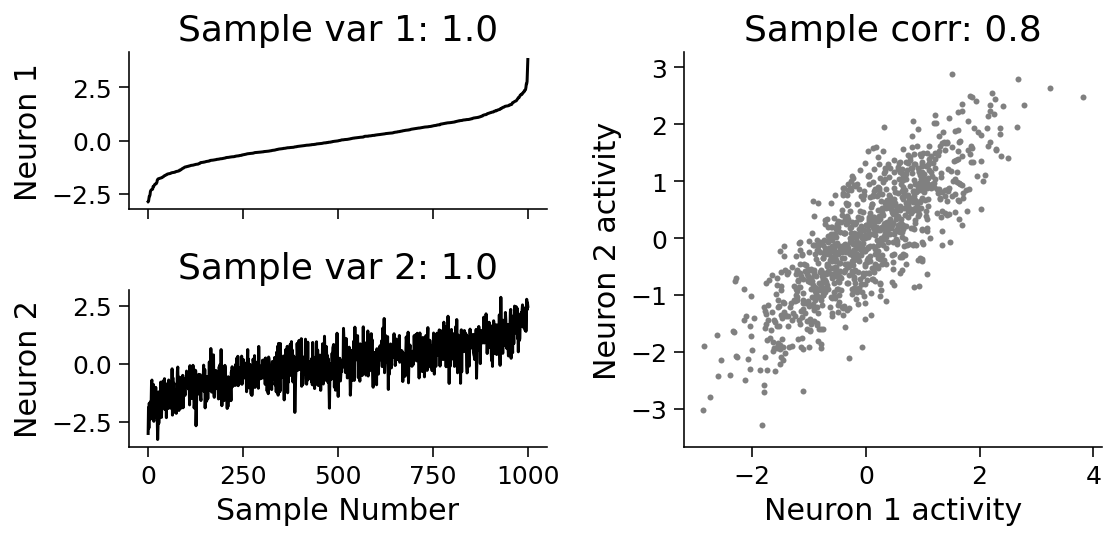

In [ ]:
def calculate_cov_matrix(var_1, var_2, corr_coef):
  """
  Calculates the covariance matrix based on the variances and correlation
  coefficient.

  Args:
    var_1 (scalar)          : variance of the first random variable
    var_2 (scalar)          : variance of the second random variable
    corr_coef (scalar)      : correlation coefficient

  Returns:
    (numpy array of floats) : covariance matrix
  """

  # Calculate the covariance from the variances and correlation
  cov = corr_coef*np.sqrt(var_1*var_2)

  cov_matrix = np.array([[var_1, cov], [cov, var_2]])

  return cov_matrix


# Set parameters
np.random.seed(2020)  # set random seed
variance_1 = 1
variance_2 = 1
corr_coef = 0.8

# Compute covariance matrix
cov_matrix = calculate_cov_matrix(variance_1, variance_2, corr_coef)

# Generate data with this covariance matrix
X = get_data(cov_matrix)

# Visualize
plot_data(X)

## Interactive Demo 1: Correlation effect on data

We'll use the function you just completed but now we can change the correlation coefficient via slider. You should get a feel for how changing the correlation coefficient affects the geometry of the simulated data.

1.   What effect do negative correlation coefficient values have?
2.   What correlation coefficient results in a circular data cloud?


Note that we sort the samples according to neuron 1's firing rate, meaning the plot of neuron 1 firing rate over sample number looks clean and pretty unchanging when compared to neuron 2.


In [ ]:
# @markdown Execute this cell to enable widget

def _calculate_cov_matrix(var_1, var_2, corr_coef):

  # Calculate the covariance from the variances and correlation
  cov = corr_coef * np.sqrt(var_1 * var_2)

  cov_matrix = np.array([[var_1, cov], [cov, var_2]])

  return cov_matrix


@widgets.interact(corr_coef = widgets.FloatSlider(value=.2, min=-1, max=1, step=0.1))
def visualize_correlated_data(corr_coef=0):
  variance_1 = 1
  variance_2 = 1

  # Compute covariance matrix
  cov_matrix = _calculate_cov_matrix(variance_1, variance_2, corr_coef)

  # Generate data with this covariance matrix
  X = get_data(cov_matrix)

  # Visualize
  plot_data(X)

interactive(children=(FloatSlider(value=0.2, description='corr_coef', max=1.0, min=-1.0), Output()), _dom_clas…

---
# Section 2: Define a new orthonormal basis

*Estimated timing to here from start of tutorial: 20 min*


## Coding Exercise 2: Find an orthonormal basis

In this exercise you will fill in the function below to define an orthonormal basis, given a single arbitrary 2-dimensional vector as an input.

**Steps**
* Modify the function `define_orthonormal_basis` to first normalize the first basis vector $\bf u$.
* Then complete the function by finding a basis vector $\bf w$ that is orthogonal to $\bf u$.
* Test the function using initial basis vector ${\bf u} = [3,1]$. Plot the resulting basis vectors on top of the data scatter plot using the function `plot_basis_vectors`. (For the data, use  $\sigma_1^2 =1$, $\sigma_2^2 =1$, and $\rho = .8$).

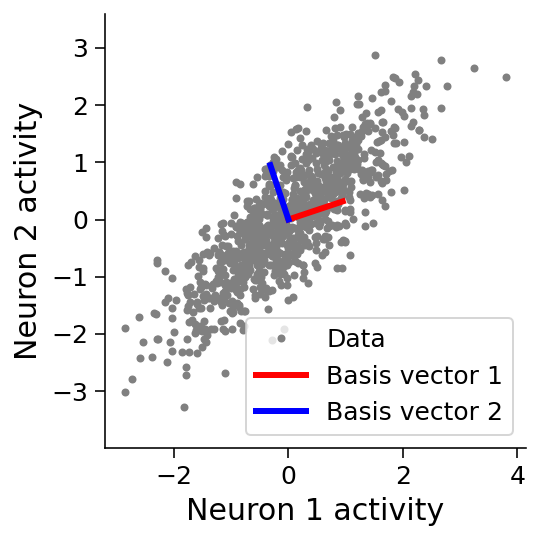

In [ ]:
def define_orthonormal_basis(u):
  """
  Calculates an orthonormal basis given an arbitrary vector u.

  Args:
    u (numpy array of floats) : arbitrary 2-dimensional vector used for new
                                basis

  Returns:
    (numpy array of floats)   : new orthonormal basis
                                columns correspond to basis vectors
  """
  # Normalize vector u
  u = u/np.sqrt(np.sum(u**2))

  # Calculate vector w that is orthogonal to w
  w = [-u[1],u[0]]

  # Put in matrix form
  W = np.column_stack([u, w])

  return W


# Set up parameters
np.random.seed(2020)  # set random seed
variance_1 = 1
variance_2 = 1
corr_coef = 0.8
u = np.array([3, 1])

# Compute covariance matrix
cov_matrix = calculate_cov_matrix(variance_1, variance_2, corr_coef)

# Generate data
X = get_data(cov_matrix)

# Get orthonomal basis
W = define_orthonormal_basis(u)

# Visualize
plot_basis_vectors(X, W)

---
# Section 3: Project data onto new basis

*Estimated timing to here from start of tutorial: 35 min*

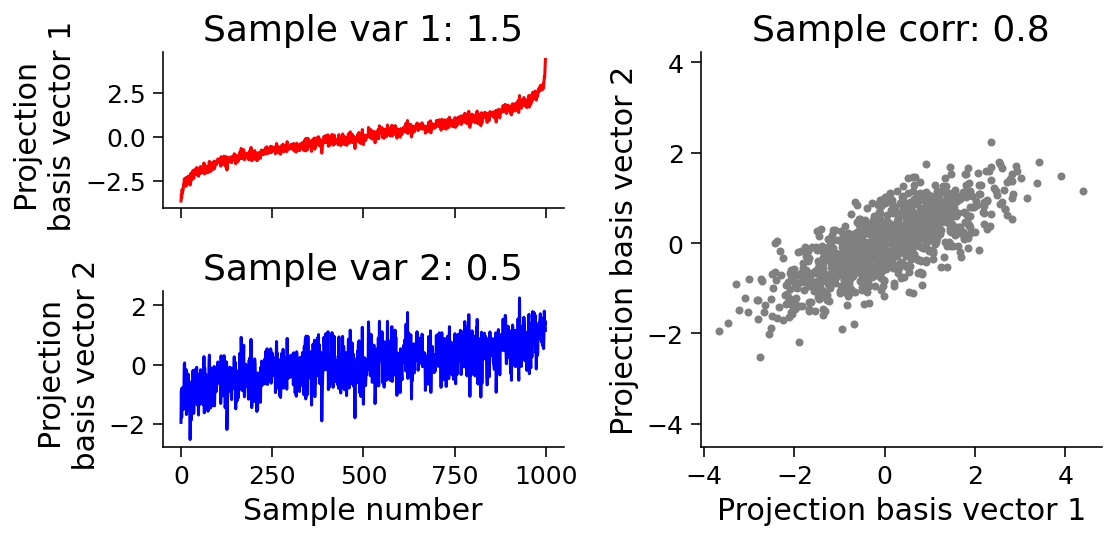

In [ ]:
def change_of_basis(X, W):
  """
  Projects data onto new basis W.

  Args:
    X (numpy array of floats) : Data matrix each column corresponding to a
                                different random variable
    W (numpy array of floats) : new orthonormal basis columns correspond to
                                basis vectors

  Returns:
    (numpy array of floats)    : Data matrix expressed in new basis
  """

  # Project data onto new basis described by W
  Y = X@W

  return Y


# Project data to new basis
Y = change_of_basis(X, W)

# Visualize
plot_data_new_basis(Y)

In [ ]:
# @markdown Make sure you execute this cell to enable the widget!

def refresh(theta=0):
  u = np.array([1, np.tan(theta * np.pi / 180)])
  W = define_orthonormal_basis(u)
  Y = change_of_basis(X, W)
  plot_basis_vectors(X, W)
  plot_data_new_basis(Y)


_ = widgets.interact(refresh, theta=(0, 90, 5))

interactive(children=(IntSlider(value=0, description='theta', max=90, step=5), Output()), _dom_classes=('widge…